## 1. Init spark with CarbonExtensions

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.enableHiveSupport().config("spark.sql.extensions", "org.apache.spark.sql.CarbonExtensions").getOrCreate()

## 2. Create CarbonData table and insert data by using spark sql

In [2]:
spark.sql("DROP TABLE IF EXISTS carbondata_table_v").show()
spark.sql("CREATE TABLE IF NOT EXISTS carbondata_table_v( id INT,age INT,salary INT) USING carbondata")
spark.sql("show databases").show()
spark.sql("show tables").show()
spark.sql("LOAD DATA LOCAL INPATH '/home/jovyan/sample_data_simple.csv' into table carbondata_table_v options('header'='True')")

++
||
++
++

+---------+
|namespace|
+---------+
|  default|
+---------+

+--------+------------------+-----------+
|database|         tableName|isTemporary|
+--------+------------------+-----------+
| default|  carbondata_table|      false|
| default|carbondata_table_v|      false|
+--------+------------------+-----------+



DataFrame[Segment ID: string]

## 3. Select data from CarbonData table

In [3]:
spark.sql("SELECT * FROM carbondata_table_v").show()

+---+---+------+
| id|age|salary|
+---+---+------+
|  1| 23| 66823|
|  2| 23|198373|
|  3| 64| 82938|
|  4| 20| 55245|
|  5| 35| 67660|
|  6| 29| 56483|
|  7| 56|173354|
|  8| 58| 64758|
|  9| 27|171463|
| 10| 43|197818|
| 11| 28|172165|
| 12| 44| 62913|
| 13| 33|113427|
| 14| 25| 71427|
| 15| 51|115963|
| 16| 19| 82024|
| 17| 41|141233|
| 18| 26|100990|
| 19| 46|144365|
| 20| 27|133994|
+---+---+------+
only showing top 20 rows



## 4. Describe the CarbonData table

In [4]:
spark.sql("DESCRIBE FORMATTED carbondata_table_v").show()

+--------------------+--------------------+-------+
|            col_name|           data_type|comment|
+--------------------+--------------------+-------+
|                  id|                 int|   null|
|                 age|                 int|   null|
|              salary|                 int|   null|
|                    |                    |       |
|## Detailed Table...|                    |       |
|            Database|             default|       |
|               Table|  carbondata_table_v|       |
|               Owner|              jovyan|       |
|             Created|Sat Apr 15 17:23:...|       |
|           Location |/home/jovyan/spar...|       |
|            External|               false|       |
|       Transactional|                true|       |
|           Streaming|               false|       |
|   Table Block Size |             1024 MB|       |
|Table Blocklet Size |               64 MB|       |
|             Comment|                    |       |
|     Bad Re

## 5. Visualization

In [5]:
df = spark.sql("SELECT age,avg(salary) as avg_salary FROM carbondata_table_v where age>=37 and age <47 group by age ")

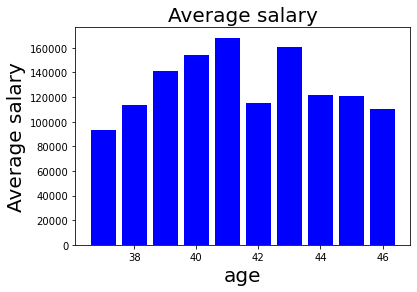

In [6]:
import numpy as np
import matplotlib.pyplot as plot
pd = df.toPandas()
plot.bar(pd["age"], pd["avg_salary"], color='blue')
plot.title('Average salary', fontsize=20)
plot.xlabel('age', fontsize=20)
plot.ylabel('Average salary', fontsize=20)
plot.show()